<img src="./images/ub_si.png" height="225" width="100%" />

# **N. W. Kusuma** || **`Big Data Final Exam`**

***
# **Libraries**
***
## Import common libraries

In [147]:
import pandas as pd 
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

## Setting compiler options
***

In [148]:
import warnings
#warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
print(os.listdir("./datasets"))

import xlrd

plt.style.use('bmh')
sns.set_style('whitegrid')
pd.set_option("display.float_format", '{:.2f}'.format)

['UAS_PCA dan Multi Linear Regression.xlsx', 'UAS_RFM.xlsx', 'UAS_SVM.xlsx']


***
# **Data Understanding**
***
## Get the data
- ### Load data files (`UAS_SVM.xlsx`)
- ### And display the first five row subset.

In [149]:
dataset = pd.read_excel("./datasets/UAS_SVM.xlsx")

dataset.head()

,Customer ID,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri,Pelunasan Kredit
0,1234561427,2,4,4,5,5,5,1,1,1
1,1234561518,1,5,2,5,4,3,4,3,0
2,1234561282,1,5,5,4,5,3,3,4,1
3,1234561064,1,2,3,1,4,2,2,3,0
4,1234561043,5,4,2,3,4,3,1,4,1


## Explore the data
***
- ### Rename the `Income.1` columns to `Income` and replace the `whitespace` in the column\`s names with `underscore`.
- ### Inspect data structures, data desciption summary, missing values, etc.

In [150]:
def inspect_data(df, note=None):
      try:
            pd.set_option("display.width", 150)
            print(f"{'*'*115}\n\tPermata Syariah Bank`s credit repayment acceleration modeling for KPR (Home Loan/Mortgage).\n"
                  f"{'='*115}\n\t\tThe data contains of `{df.shape[0]}` entries and `{df.shape[1]}` columns.\n"      
                  f"{'-'*115}\n\t\tColumns:\t\tdtypes:\t\t# Unique:\t# NaN:")
            for i in range(len(df.columns)):
                  if len(df.columns.values[i]) >= 16: s = '\t'
                  elif len(df.columns.values[i]) >= 8: s = '\t\t'
                  else: s = '\t\t\t'
                  print(f"\t\t{df.columns.values[i]}{s}"
                        f"{np.dtype(df.iloc[:,i])}\t\t"
                        f"{df.iloc[:,i].nunique()}\t\t"
                        f"{df.iloc[:,i].isnull().sum()}") 
            print(f"{'='*115}\n{df.describe().T}")
      finally:
            if note != None: print(f"{'='*115}\nNote:\n{note}\n{'*'*115}")
            else: print('*'*115)
            pd.reset_option("display.width")

In [151]:
dataset.rename(columns={'Income.1':'Income'}, inplace=True)
dataset.columns = dataset.columns.str.replace(' ','_')

In [152]:
inspect_data(dataset)

*******************************************************************************************************************
	Permata Syariah Bank`s credit repayment acceleration modeling for KPR (Home Loan/Mortgage).
		The data contains of `999` entries and `10` columns.
-------------------------------------------------------------------------------------------------------------------
		Columns:		dtypes:		# Unique:	# NaN:
		Customer_ID		int64		631		0
		Age			int64		5		0
		Income			int64		5		0
		Education		int64		5		0
		Occupation		int64		5		0
		Income			int64		5		0
		Average_Balance		int64		5		0
		Appraisal		int64		5		0
		Industri		int64		5		0
		Pelunasan_Kredit	int64		2		0
                  count          mean    std           min           25%           50%           75%           max
Customer_ID      999.00 1234561509.12 289.84 1234561000.00 1234561259.00 1234561503.00 1234561774.00 1234561998.00
Age              999.00          2.94   1.45          1.00          2.00          3.00         

## Visualize the data
***
- ### Display the correlation matrix between features.
- ### Visualize the count of `target` feature.

Correlations matrix between features:


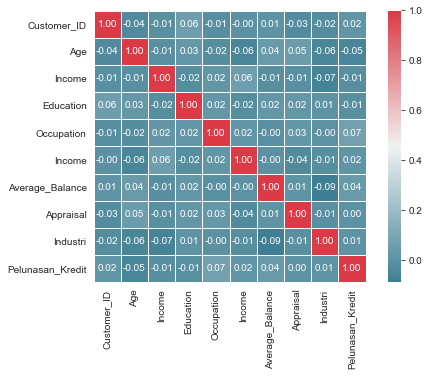

In [153]:
#Generate correlation matrix
corr = dataset.corr()
#print(f"Correlations matrix between features:\n{corr}")
print(f"Correlations matrix between features:")

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True, fmt='.2f', linewidths=0.5);
#sns.countplot(dataset['Pelunasan_Kredit'], label = "Count");

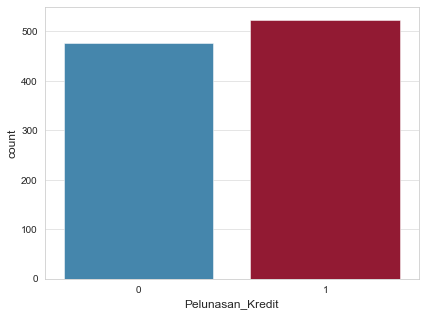

In [154]:
f, ax = plt.subplots(figsize=(6.7, 5))
sns.countplot(dataset['Pelunasan_Kredit'], label = "Count");

***
# **Data Preparation**
***
## Assign `target` feature
- ### Choose the `Pelunasan_Kredit` column as the `target` feature.

In [155]:
# Determine target feature
y = dataset['Pelunasan_Kredit']
X = dataset.drop('Pelunasan_Kredit', axis=1)

print(f"{'-'*40}\n Dimension of the target: {y.shape}\n\tand the features: {X.shape}\n{'-'*40}")

----------------------------------------
 Dimension of the target: (999,)
	and the features: (999, 9)
----------------------------------------


## Splitting the data
***
- ### Dividing the dataset into `training` and `testing` sets with `70%` and `30%` proportion respectively..

In [156]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing set with 70% and 30% proportion respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"{'*'*45}\n  The dimension of y_train : {y_train.shape}\n\t     "
      f"  and X_train : {X_train.shape}\n{'-'*45}\n"
      f"  The dimension of y_test  : {y_test.shape}\n\t     "
      f"  and X_test  : {X_test.shape}\n{'*'*45}")

*********************************************
  The dimension of y_train : (699,)
	       and X_train : (699, 9)
---------------------------------------------
  The dimension of y_test  : (300,)
	       and X_test  : (300, 9)
*********************************************


## Scalling the data
***
- ### We first need to scale and standardize our dataset so we can apply `PCA` to it.
- ### I will use `StandarScaler` to do it.

In [157]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(f"{'*'*75}\n\tDimension of the training X after scaling: {X_train.shape}\n{'-'*75}\n"
      f"\t\t  And the testing X after scaling: {X_test.shape}\n{'*'*75}")

***************************************************************************
	Dimension of the training X after scaling: (699, 9)
---------------------------------------------------------------------------
		  And the testing X after scaling: (300, 9)
***************************************************************************


***
# **Data Modeling** 
***
## Applying Support Vector Machines (Kernels)
- `C parameter`: Controlls trade-off between classifying training points correctly and having a smooth decision boundary.
    - Small C (loose) makes cost (penalty) of misclassification low (soft margin)
    - Large C (strict) makes cost of misclassification high (hard margin), forcing the model to explain input data stricter and potentially over it.
- `gamma parameter`: Controlls how far the influence of a single training set reaches.
    - Large gamma: close reach (closer data points have high weight)
    - Small gamma: far reach (more generalized solution)
- `degree parameter` : Degree of the polynomial kernel function (`'poly'`). Ignored by all other kernels.

In [158]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.svm import SVC

def eval_model(clf, X_df, y_df, ln=54):
    try:
        clf.fit(X_df,y_df)
        pred = clf.predict(X_df)
    finally:
        print(f"{'*'*ln}\nAccuracy Score: {accuracy_score(y_df, pred):.3f}\n"
              f"{'='*54}\nClassification Report:\n{'-'*54}\n"
              f"{classification_report(y_df, pred, zero_division=1)}\n"
              f"{'='*54}\nConfusion Matrix:\n{'-'*54}\n{confusion_matrix(y_df, pred)}\n{'*'*ln}\n")
    

## **Linear Kernel SVM**
****

In [159]:
print(f"\n:: Linear Kernel SVM {'='*33}")
model = SVC(kernel='linear')

eval_model(model, X_train, y_train)


:: Linear Kernel SVM =================================
******************************************************
Accuracy Score: 0.538
Classification Report:
------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       323
           1       0.54      1.00      0.70       376

    accuracy                           0.54       699
   macro avg       0.77      0.50      0.35       699
weighted avg       0.75      0.54      0.38       699

Confusion Matrix:
------------------------------------------------------
[[  0 323]
 [  0 376]]
******************************************************



## **Polynomial Kernel SVM**
***

In [160]:
print(f"\n:: Polynomial Kernel SVM {'='*29}")
model = SVC(kernel='poly', degree=2, gamma='auto')

eval_model(model, X_train, y_train)


:: Polynomial Kernel SVM =============================
******************************************************
Accuracy Score: 0.538
Classification Report:
------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       323
           1       0.54      1.00      0.70       376

    accuracy                           0.54       699
   macro avg       0.77      0.50      0.35       699
weighted avg       0.75      0.54      0.38       699

Confusion Matrix:
------------------------------------------------------
[[  0 323]
 [  0 376]]
******************************************************



## **Radial Kernel SVM**
***

In [161]:
print(f"\n:: Radial Kernel SVM {'='*33}")
model = SVC(kernel='rbf', gamma=1)

eval_model(model,X_test, y_test)


:: Radial Kernel SVM =================================
******************************************************
Accuracy Score: 0.757
Classification Report:
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       153
           1       0.74      0.78      0.76       147

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300

Confusion Matrix:
------------------------------------------------------
[[113  40]
 [ 33 114]]
******************************************************



***
# **Evaluation**
***
### Aplying SVM model to testing datasets

In [162]:
from sklearn.svm import SVC

print(f"\n:: Linear Kernel SVM {'='*33}")
model = SVC(kernel='linear')

eval_model(model, X_test, y_test)


:: Linear Kernel SVM =================================
******************************************************
Accuracy Score: 0.563
Classification Report:
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       153
           1       0.56      0.54      0.55       147

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.56      0.56      0.56       300

Confusion Matrix:
------------------------------------------------------
[[90 63]
 [68 79]]
******************************************************



In [163]:
print(f"\n:: Polynomial Kernel SVM {'='*29}")
model = SVC(kernel='poly', degree=2, gamma='auto')

eval_model(model, X_test, y_test)


:: Polynomial Kernel SVM =============================
******************************************************
Accuracy Score: 0.530
Classification Report:
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.99      0.68       153
           1       0.80      0.05      0.10       147

    accuracy                           0.53       300
   macro avg       0.66      0.52      0.39       300
weighted avg       0.66      0.53      0.40       300

Confusion Matrix:
------------------------------------------------------
[[151   2]
 [139   8]]
******************************************************



In [164]:
print(f"\n:: Radial Kernel SVM {'='*33}")
model = SVC(kernel='rbf', gamma=1)

eval_model(model, X_test, y_test)


:: Radial Kernel SVM =================================
******************************************************
Accuracy Score: 0.757
Classification Report:
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       153
           1       0.74      0.78      0.76       147

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300

Confusion Matrix:
------------------------------------------------------
[[113  40]
 [ 33 114]]
******************************************************



# Support Vector Machine Hyperparameter tuning
***

In [165]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

print("-"*80)
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, iid=True)

eval_model(grid, X_train, y_train, 80)
eval_model(grid, X_test, y_test, 80)

--------------------------------------------------------------------------------
Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:  8.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


********************************************************************************
Accuracy Score: 0.641
Classification Report:
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.31      0.44       323
           1       0.61      0.93      0.73       376

    accuracy                           0.64       699
   macro avg       0.70      0.62      0.59       699
weighted avg       0.69      0.64      0.60       699

Confusion Matrix:
------------------------------------------------------
[[100 223]
 [ 28 348]]
********************************************************************************

Fitting 5 folds for each of 126 candidates, totalling 630 fits
********************************************************************************
Accuracy Score: 0.510
Classification Report:
------------------------------------------------------
              precision    recall  f1-score   support

           0   

[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:   30.7s finished
